Group Members : CHEREL Bastien - MAALOUL Ahmed

## TUTORIAL 4: EXPLAINABILITY AI

### Question 2.

Select a dataset on Kaggle that seems interesting for the group. The dataset must contain explanatory variables that can be interpreted.

https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1085]:
import pandas as pd 

data = pd.read_csv("housing-2.csv")

In [1086]:
# Convert the median income from thousands $ to $ 
data["median_income"] *= 10000 
# Remove the outliers (e.g. herer 500,000 was a ceiling value)
data = data[data["median_house_value"] < 500000]
data = data[data["housing_median_age"] < 50]
# Remove the people that lives on an island not relevant <1%
data = data[data["ocean_proximity"]!="ISLAND"]

In [1087]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,20804.0,226700.0,NEAR BAY
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,13578.0,147500.0,NEAR BAY
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,17135.0,159800.0,NEAR BAY


### Question 3.
Let’s begin with some visualisations.
* Based on your intuition what are the most important variables for predicting your target variable?

To predict the median house value the most important variables may be : 
- the median income
- the ocean proximity
- the total rooms



* Create visualisations that take into account the type of variable (categorical, numerical) that show
the correlation of the features you selected.


In [1088]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1089]:
# sns.pairplot(data)

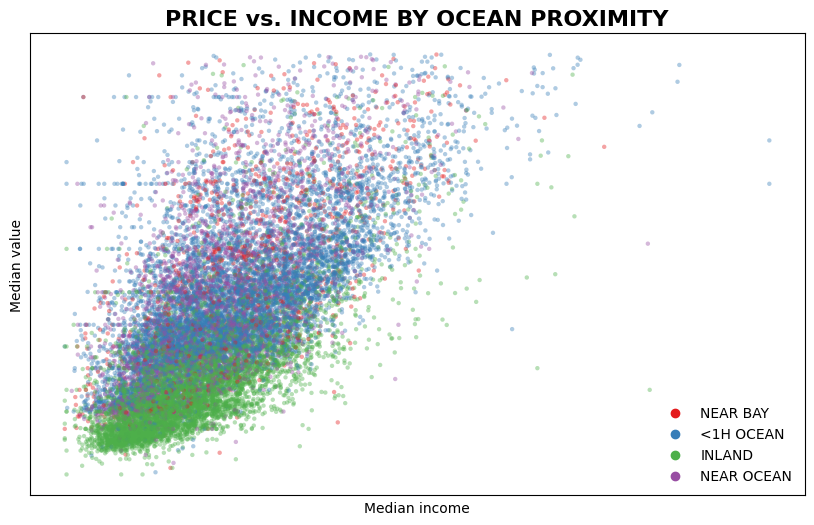

In [1090]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="median_income", y="median_house_value", palette = "Set1",hue="ocean_proximity", marker="o",s=10,linewidth=0, alpha = 0.4)

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.title("PRICE vs. INCOME BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)


legend.remove()  # Remove the default legend
plt.legend(title_fontsize=12, loc='lower right', frameon = False)
plt.tick_params(left=False, right=False, labelleft=False)
plt.xlabel("Median income")
plt.ylabel("Median value")
plt.show()

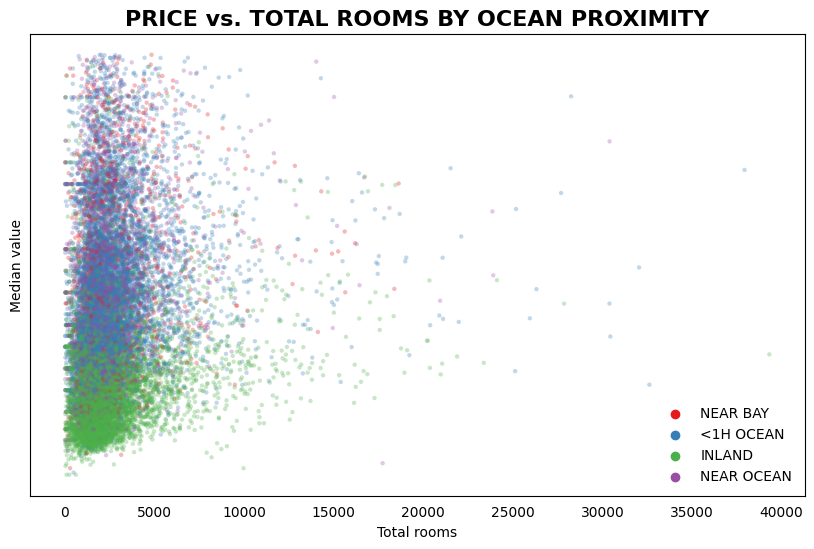

In [1091]:
plt.figure(figsize=(10,6))
sns.scatterplot(data, x="total_rooms", y="median_house_value", palette = "Set1",hue="ocean_proximity", marker="o",s=10,linewidth=0, alpha = 0.3)

plt.tick_params(left = False, right = False , labelleft = False , bottom = False) 
plt.title("PRICE vs. TOTAL ROOMS BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
legend = plt.legend(loc='upper right', title="Obesity", title_fontsize=12)


legend.remove()  # Remove the default legend
plt.legend(title_fontsize=12, loc='lower right', frameon = False)
plt.xlabel("Total rooms")
plt.ylabel("Median value")
plt.show()

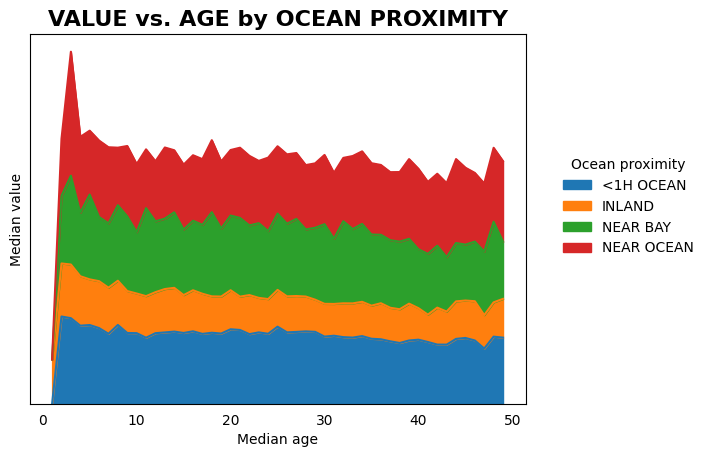

In [1092]:
import numpy as np

df_counts = data.groupby(['housing_median_age', 'ocean_proximity'])['median_house_value'].mean().unstack()
ax = df_counts.plot(kind='area', stacked=True)

# Set title and axis labels
plt.title("VALUE vs. AGE by OCEAN PROXIMITY", fontsize=16, fontweight='bold')
plt.xlabel("Median age")
plt.ylabel("Median value")

# Customize ticks and labels
plt.tick_params(left=False, bottom=False, labelleft=False)
plt.xticks(rotation=0)

# Adjust legend position and remove frame
plt.legend(title="Ocean proximity", bbox_to_anchor=(1.05, 0.7), frameon=False)


# Show the plot
plt.show()


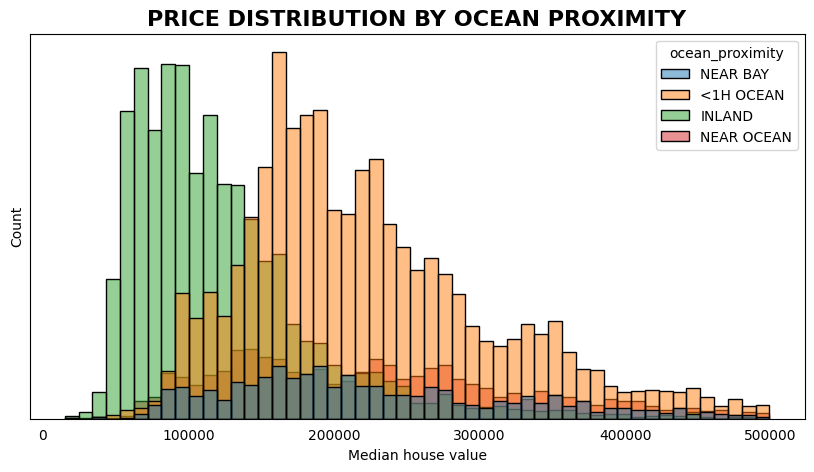

In [1093]:
plt.figure(figsize=(10, 5))
seaborn_legend = sns.histplot(data, x="median_house_value", hue="ocean_proximity", fill=True, legend=True)

plt.tick_params(left = False, right = False , labelleft = False , bottom = False) 
plt.xlabel("Median house value")
plt.title("PRICE DISTRIBUTION BY OCEAN PROXIMITY",fontsize=16, fontweight='bold')
plt.show()

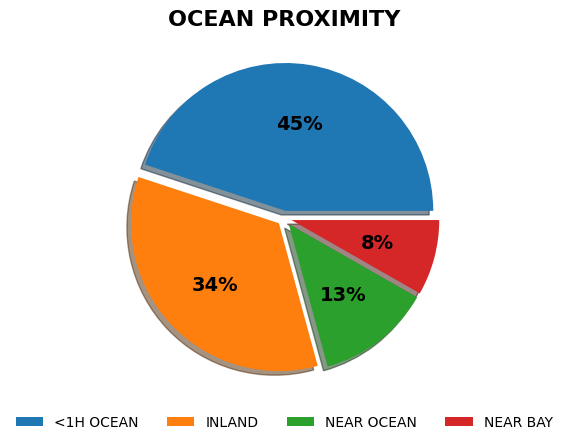

In [1094]:
plt.style.use("default")

# Create pie chart
array = data["ocean_proximity"].value_counts()
ax = array.plot(kind="pie", startangle=0,
                shadow=True, legend=True, ylabel="", textprops={'weight': 'bold', 'size': 14},
                autopct='%1.0f%%', pctdistance=.6, labeldistance=None, explode=[0.05 for _ in range(len(array))])

# Adjust legend position
ax.legend(bbox_to_anchor=(0.5, -0), loc='upper center', frameon=False, ncol=len(array))

plt.title("OCEAN PROXIMITY", fontsize=16, fontweight='bold')
plt.show()

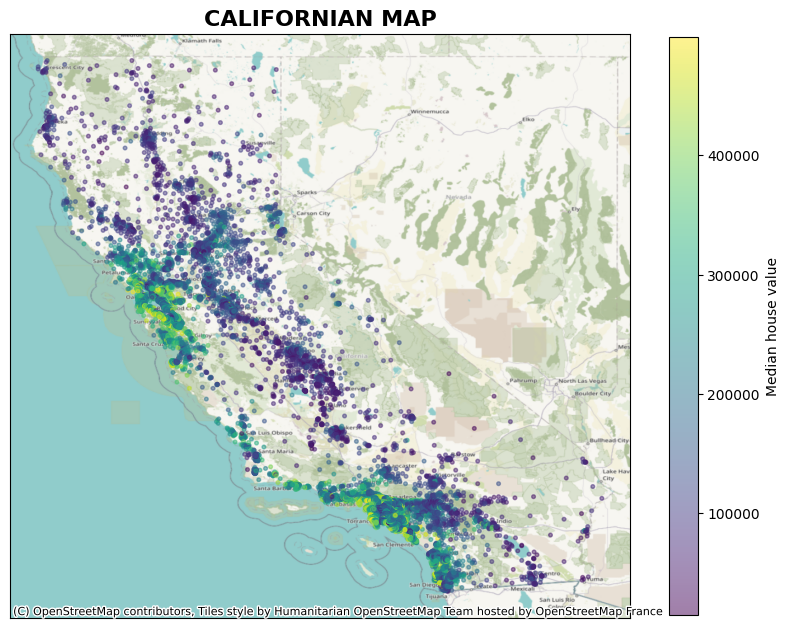

In [1095]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# Create GeoDataFrame with 'latitude' and 'longitude' columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plot the GeoDataFrame with a basemap
fig, ax = plt.subplots(figsize=(10, 10))

gdf.crs = "EPSG:4326"
# Plot the GeoDataFrame
plot = gdf.plot(ax=ax, column='median_house_value', cmap='viridis', alpha=0.5, markersize=7, legend=False)

ctx.add_basemap(ax, crs = gdf.crs.to_string())

cbar = plt.colorbar(plot.collections[0], ax=ax, orientation='vertical', shrink=0.75)
cbar.set_label('Median house value')
# Show the plot
plt.title('CALIFORNIAN MAP',fontsize=16, fontweight='bold')
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.show()

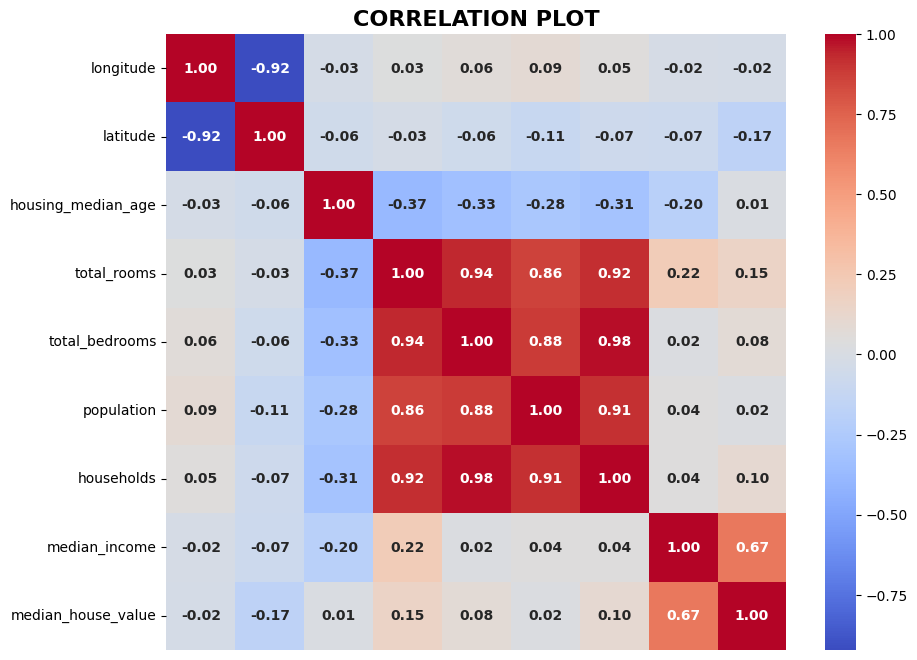

In [1096]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10, "fontweight" :"bold"}, xticklabels=False)
plt.title('CORRELATION PLOT', fontsize=16, fontweight = "bold")
plt.xlabel("")
plt.show()

* Don’t forget to clean your dataset as needed in order to deal with missing values and outliers

In [1097]:
# Drop the points when a value is missing
data = data.dropna()

data["ocean_proximity"] = data["ocean_proximity"].replace("<1H OCEAN", "LESS 1H")

data.to_csv("housing.csv", index=False)

# Drop useless columns
data = data.drop(columns=["latitude","longitude", "total_bedrooms",	"population", "households"])

### Question 4.
Let’s do a linear regression.
* Do the variable transformations that are needed (on hot encoding, log etc...)


In [1098]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()
data = pd.get_dummies(data, columns = non_numeric_columns, drop_first=False)
data

,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_LESS 1H,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,83252.0,452600.0,0,0,1,0
1,21.0,7099.0,83014.0,358500.0,0,0,1,0
8,42.0,2555.0,20804.0,226700.0,0,0,1,0
20,40.0,751.0,13578.0,147500.0,0,0,1,0
21,42.0,1639.0,17135.0,159800.0,0,0,1,0
...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,15603.0,78100.0,1,0,0,0
20636,18.0,697.0,25568.0,77100.0,1,0,0,0
20637,17.0,2254.0,17000.0,92300.0,1,0,0,0
20638,18.0,1860.0,18672.0,84700.0,1,0,0,0


* Fit the linear regression


In [1099]:
# Select features and target variable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "median_house_value"

# Extract features and target variable
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")


Root Mean Squared Error: 61232.170
R-squared: 0.583


* Interpret the coeﬀicients of your regression


In [1100]:

# Access coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_
feature_names = X.columns.to_numpy()
# Print the coefficients and intercept
print("Features :", feature_names)
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept:.3f}")


Features : ['housing_median_age' 'total_rooms' 'median_income'
 'ocean_proximity_INLAND' 'ocean_proximity_LESS 1H'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
Coefficients: [ 6.45576187e+02  2.53221735e+00  3.56353208e+00 -5.43010851e+04
  1.36547463e+04  1.11871504e+04  2.94591884e+04]
Intercept: 41364.033


* Does any coeﬀicient contradict your intuition?

We didn't think that the median age would be so significant; in fact, exactly as we thought, the closer the house is to the ocean, the higher the price.

### Question 5.
Let’s build a more complex model
* Build the ”best” model you can using traditional data science (no deep learning)
* Don’t hesitate to fine tune it, try different combination of variables etc



In [1101]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = "median_house_value"

# Assuming 'data' is your DataFrame and contains the target and features.

# Extract features and target variable
X = data.drop(target, axis=1)
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_params = {
    'max_depth': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 200
}
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(**best_params, random_state=42)

# Fit GridSearchCV to the data
random_forest_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = random_forest_model.predict(X_test)

# Evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")

Root Mean Squared Error: 61232.170
R-squared: 0.605


In [1102]:
from sklearn.model_selection import GridSearchCV
import xgboost

# Assuming you have your dataset loaded and preprocessed, and the features are in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for XGBoost regression
params = {
    'objective': 'reg:squarederror',  # For regression
    'eval_metric': 'rmse',            # Evaluation metric (Root Mean Squared Error)
    'eta': 0.3,                       # Learning rate
    'max_depth': 5,                   # Maximum depth of the tree
    'min_child_weight': 15,           # Minimum sum of instance weight needed in a child
    'subsample': 0.8,                 # Subsample ratio of the training instance
    'colsample_bytree': 0.8,          # Subsample ratio of columns when constructing each tree
    'gamma': 0,                       # Minimum loss reduction required to make a further partition on a leaf node
    'seed': 666                       # Random seed for reproducibility
}

# Initialize XGBoost regressor
xgb_model = xgboost.XGBRegressor(**params)

xgb_model.fit(X_train, y_train)

# Fit the XGBoost model with the best parameters
xgb_model = xgboost.XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = xgb_model.predict(X_test)

[11:11:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



* What is the best metric you can reach? Can you consider it ”good”


In [1103]:
# Evaluate model performance
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse_xgb:.3f}")
print(f"R-squared: {r2_xgb:.3f}")

Root Mean Squared Error: 67570.904
R-squared: 0.492


* Given your results what use case can be done with this model?

Automatically predict house prices in the agency application

### Question 6.
Using shapley values explain your model
* Start by giving some forceplot examples


RANDOM FOREST PART

In [1104]:
import shap

shap.initjs()

rf_explainer = shap.TreeExplainer(random_forest_model)
shap_values = rf_explainer.shap_values(X_test)

shap.force_plot(rf_explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

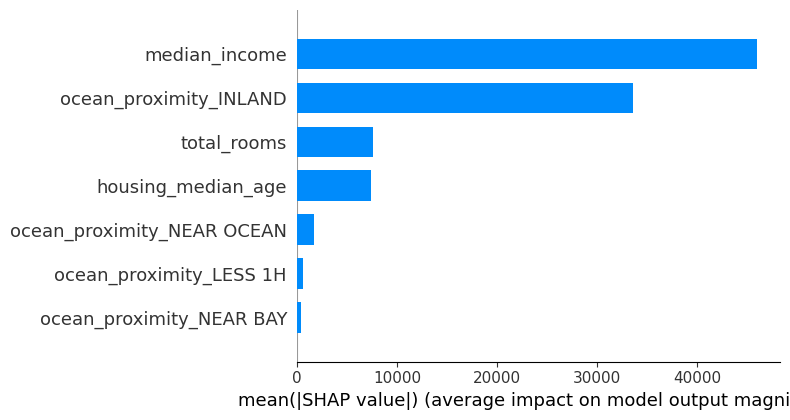

In [1105]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

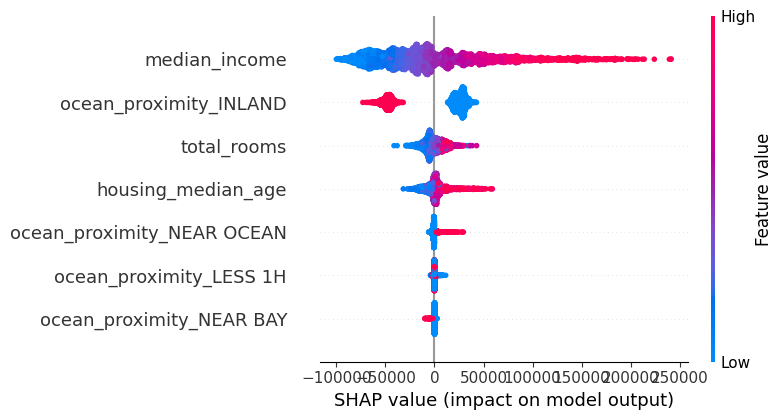

In [1106]:
shap.summary_plot(shap_values, X_test)

Sample: 0


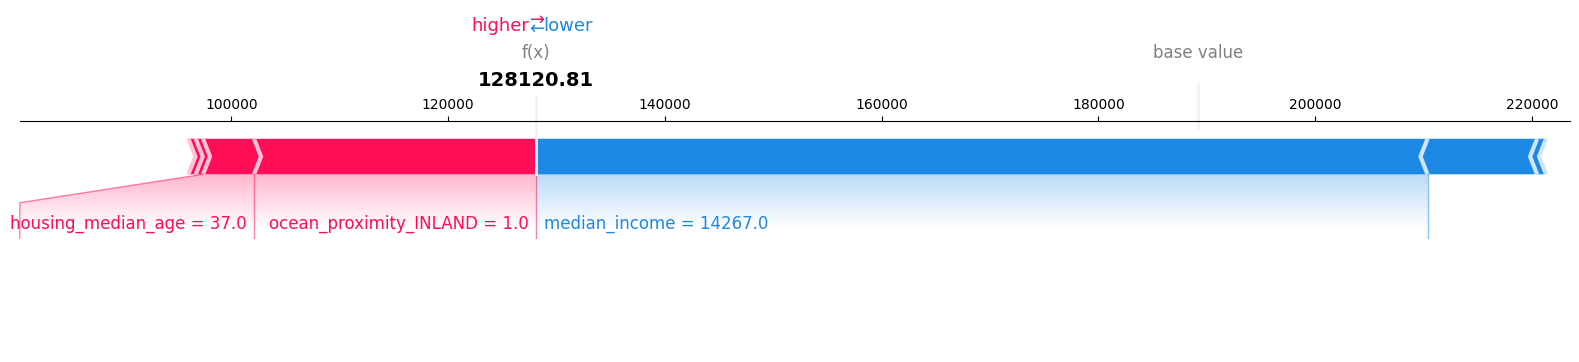

Sample: 1


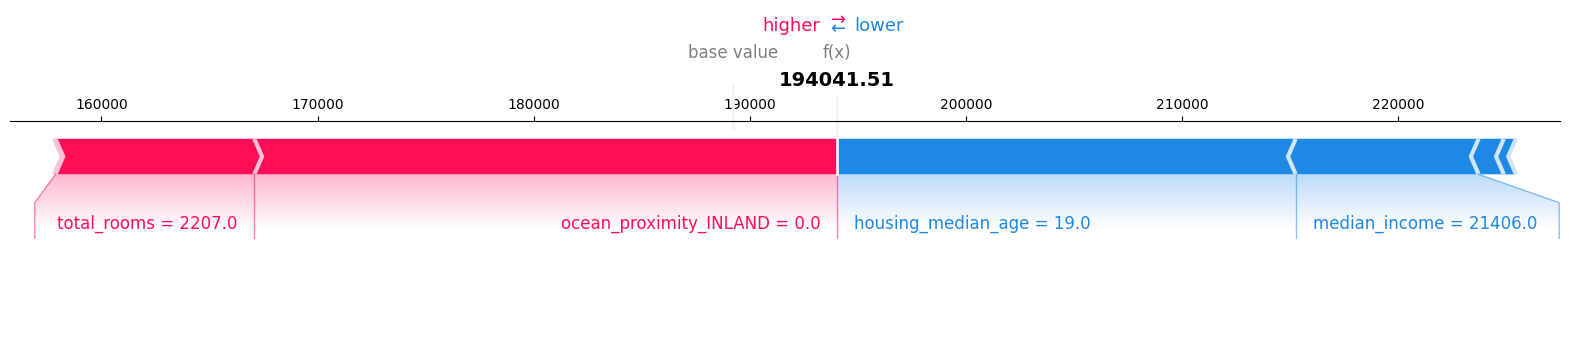

Sample: 2


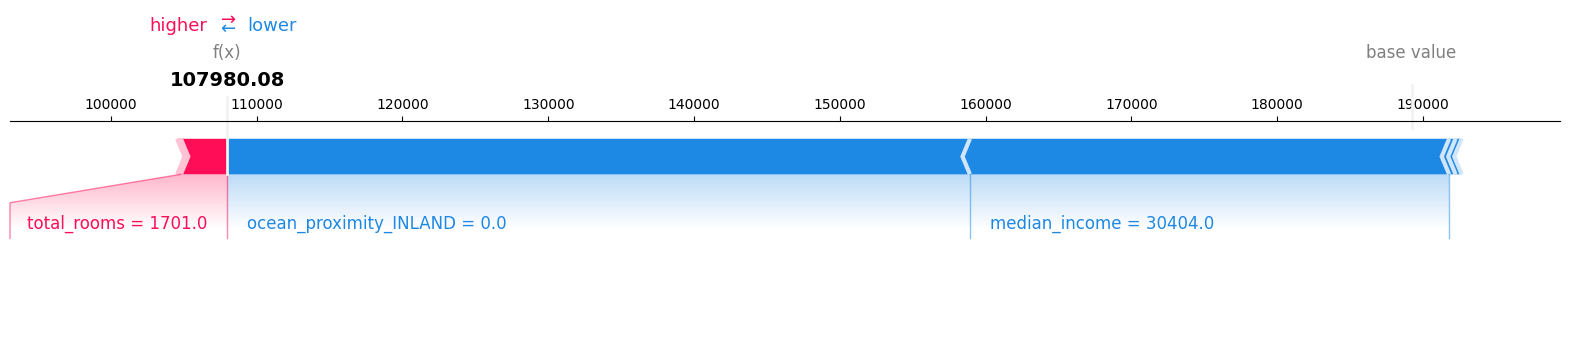

In [1107]:
sample_indices = [0, 1, 2]  
rf_shap_values = rf_explainer.shap_values(X_train)

for i, idx in enumerate(sample_indices):
    print("Sample:", idx)
    shap.force_plot(rf_explainer.expected_value, rf_shap_values[idx], features=X_test.iloc[idx], feature_names=X_train.columns,matplotlib=True, show=True)
    plt.show()

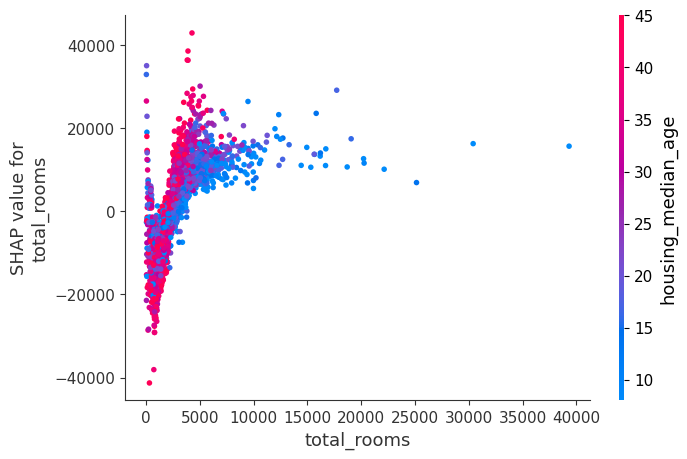

In [1108]:
shap.dependence_plot("total_rooms", shap_values, X_test)

XGBOOST PART

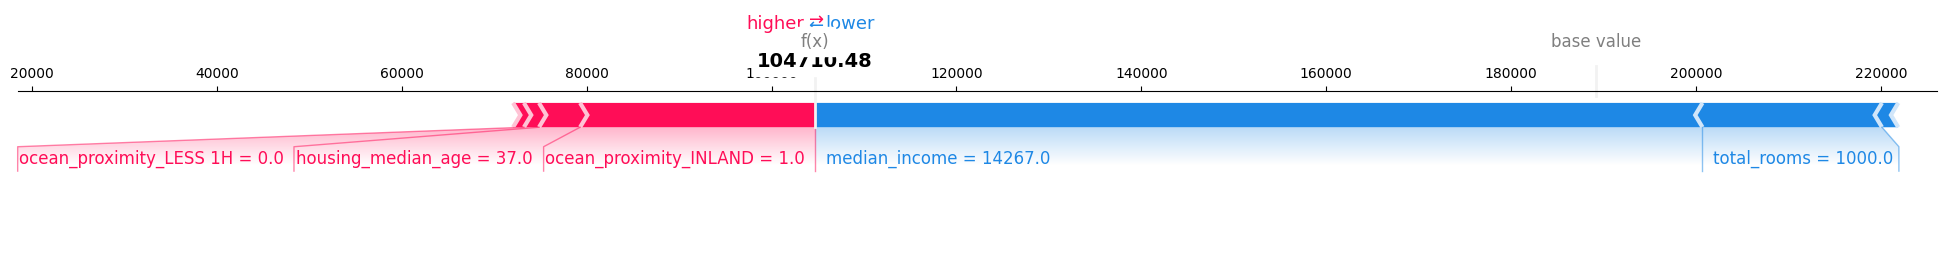

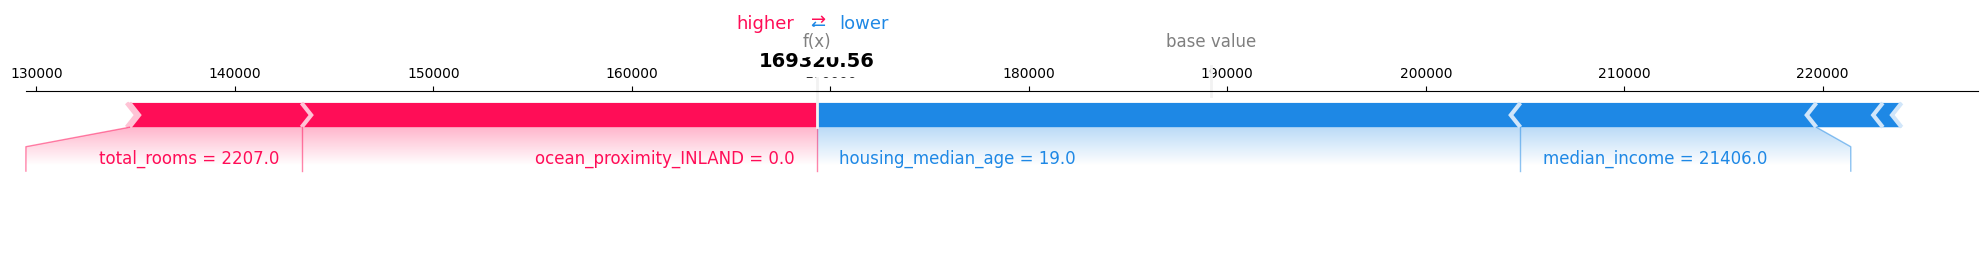

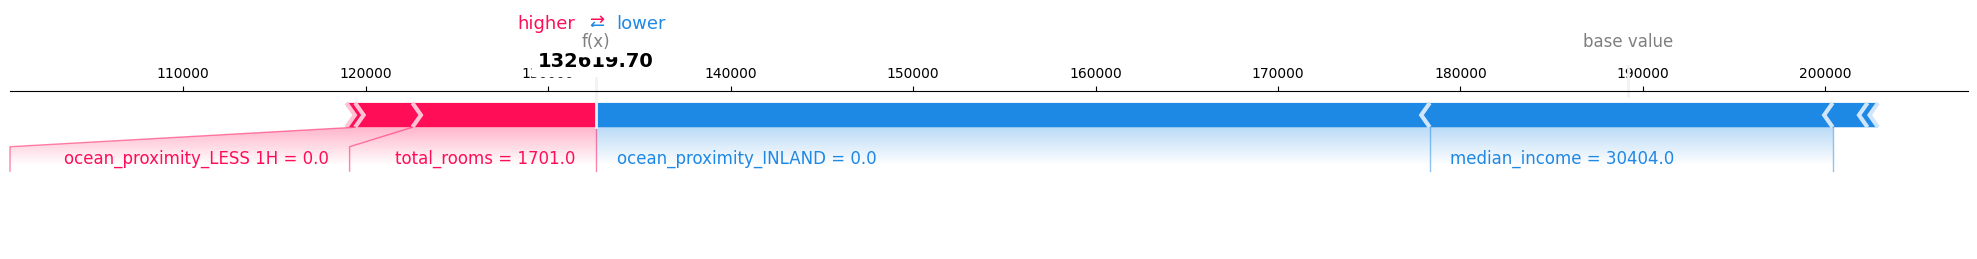

In [1109]:
import shap 
sample_indices = [0, 1, 2]  # Select a few samples for visualization
xgb_explainer = shap.TreeExplainer(xgb_model)

xgb_shap_values = xgb_explainer.shap_values(X_train)

for i, idx in enumerate(sample_indices):
    shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[idx], features=X_test.iloc[idx], feature_names=X_train.columns,matplotlib=True,show=False)
    plt.tight_layout() 
plt.show()

* Use the feature importance and identify the most important variables


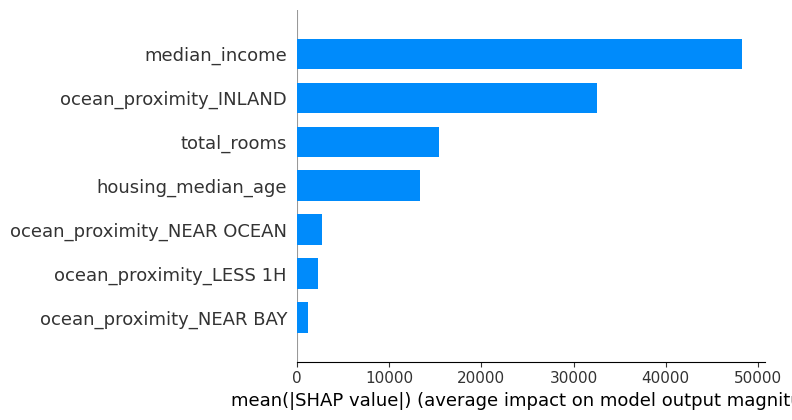

In [1110]:
shap.summary_plot(xgb_shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

plt.show()

* Compare them to the variables identified in the linear regression


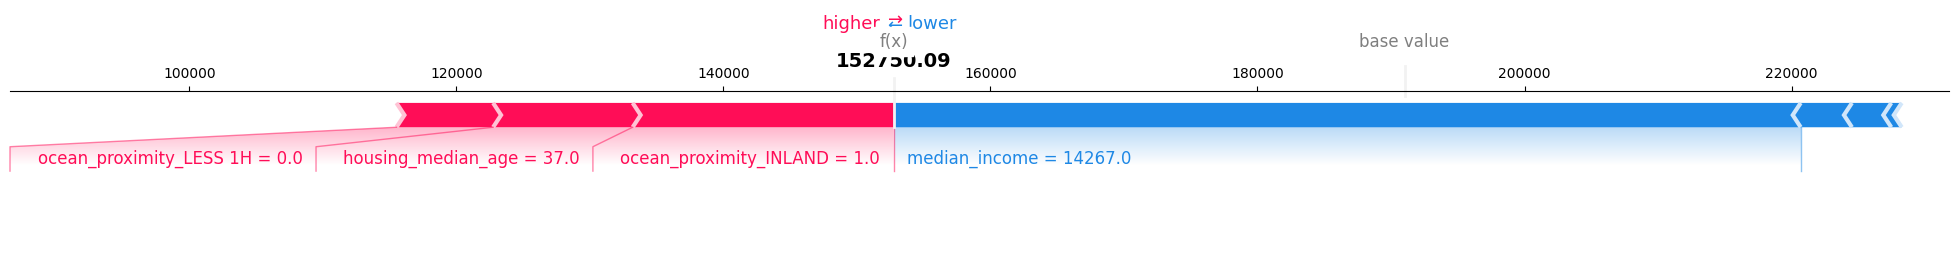

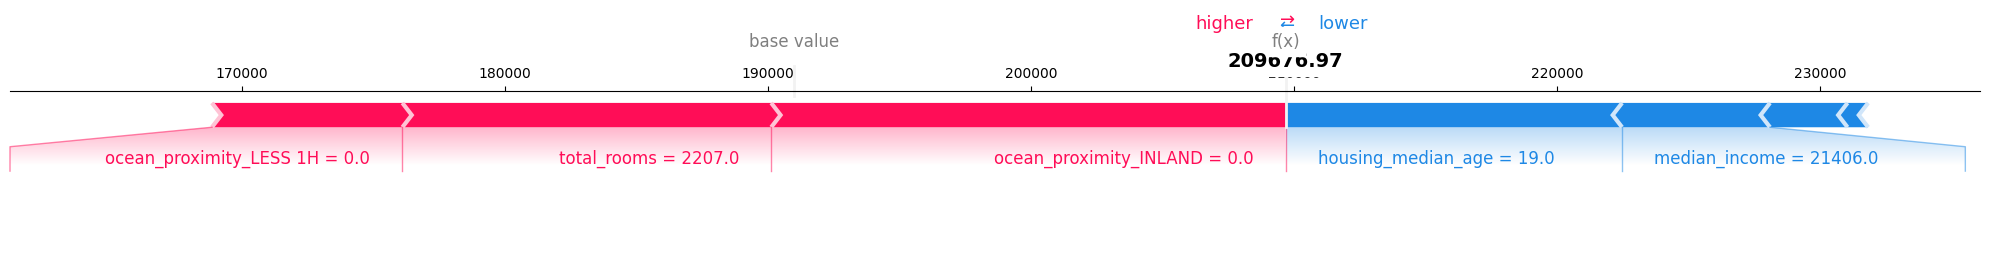

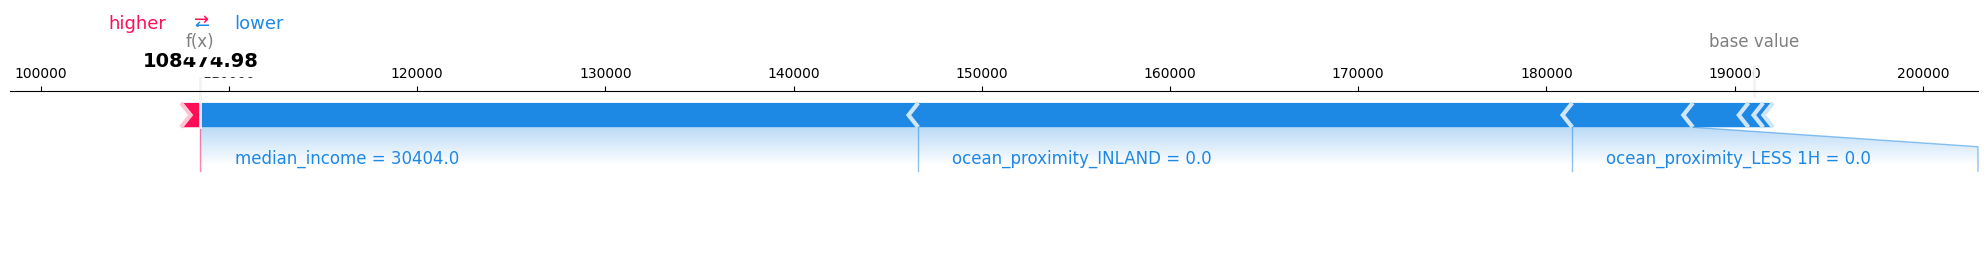

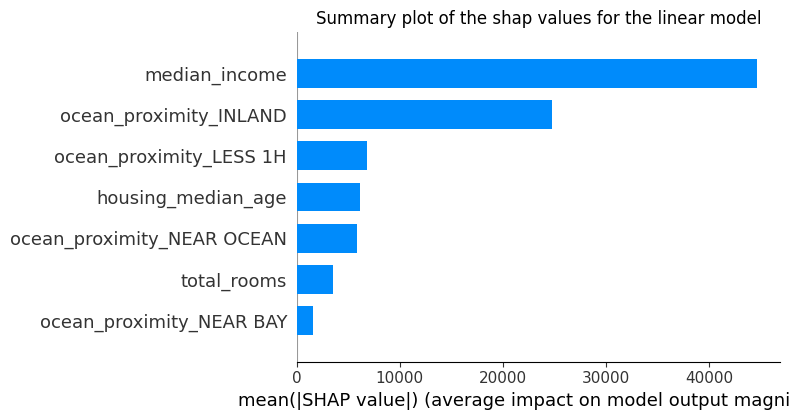

In [1111]:
sample_indices = [0, 1, 2]  # Select a few samples for visualization
linear_explainer = shap.Explainer(linear_model, X_train)

linear_shap_values = linear_explainer.shap_values(X_train)

for i, idx in enumerate(sample_indices):
    shap.force_plot(linear_explainer.expected_value, linear_shap_values[idx], features=X_test.iloc[idx],feature_names=X_train.columns,matplotlib=True, show=False)
    plt.tight_layout()

plt.show()


plt.title("Summary plot of the shap values for the linear model")
shap.summary_plot(linear_shap_values, X_test, plot_type="bar", feature_names=X_train.columns)

plt.show()

* Using the beeswarm plot explain the model behaviour for the most important variables


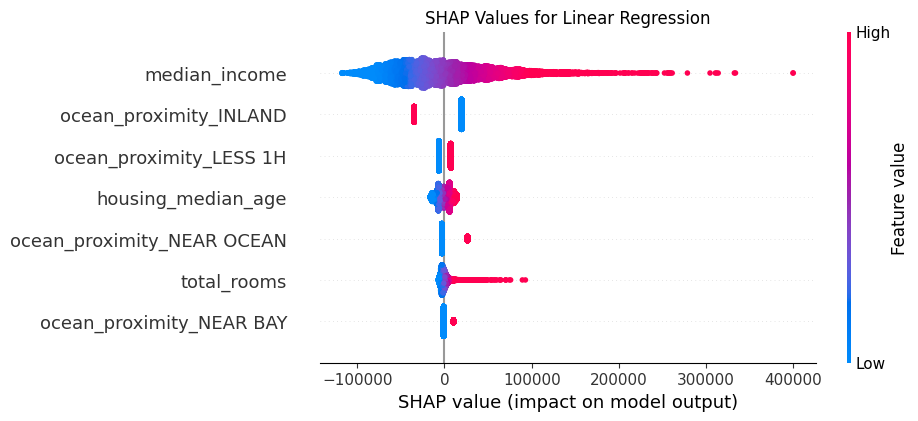

In [1112]:
import seaborn as sns

linear_shap_obj = linear_explainer(X)
plt.title("SHAP Values for Linear Regression")

shap.plots.beeswarm(linear_shap_obj)

plt.show()

* Use dependance plots in order to understand the behaviour of the most important variables


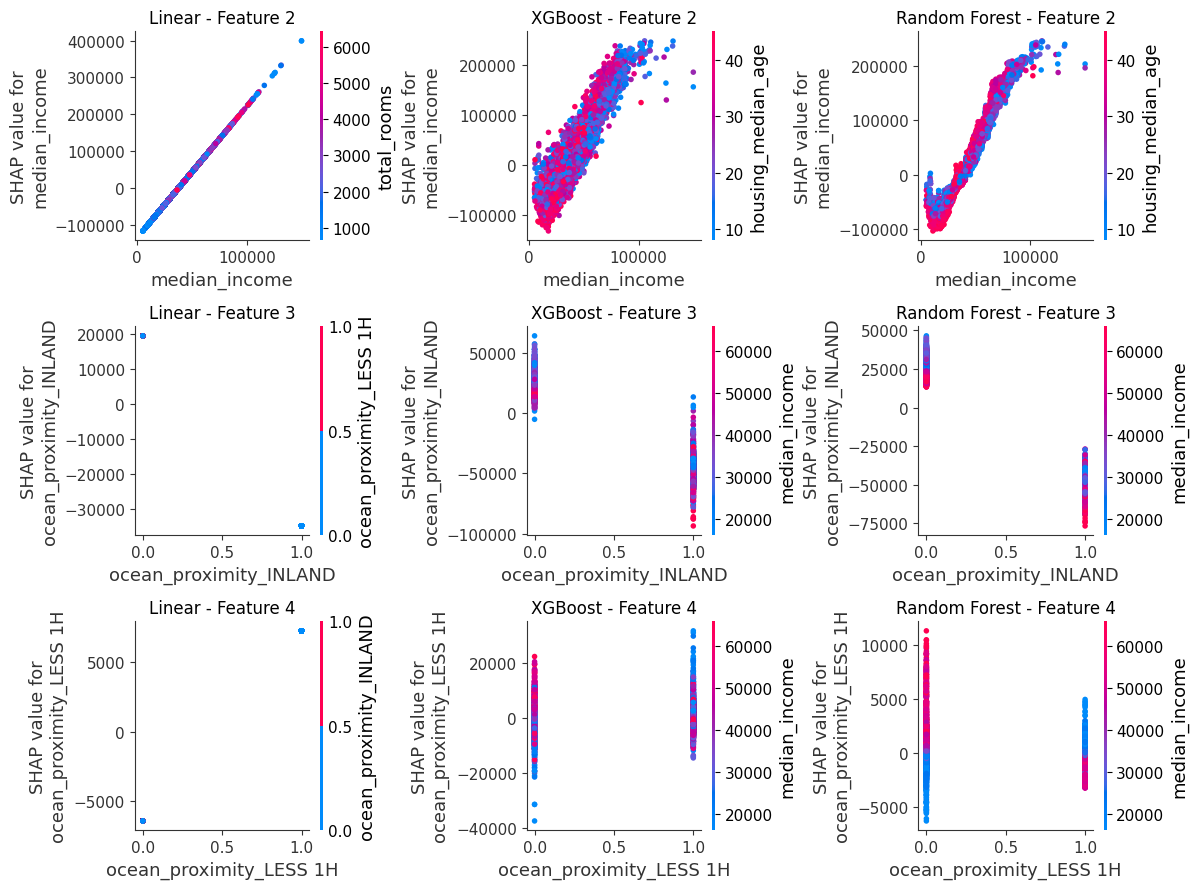

In [1113]:
# Get the indices of the most important features based on SHAP values
top_features_indices = np.argsort(np.abs(linear_shap_values).mean(0))[::-1][:3]  # Select top 3 features

# Number of top features to display
num_top_features = len(top_features_indices)

# Create subplots
fig, axs = plt.subplots(num_top_features, 3, figsize=(12, num_top_features * 3))

# Plot dependency plots for the most important features
for i, feature_idx in enumerate(top_features_indices):
    # Plot for Random Forest
    shap.dependence_plot(feature_idx, linear_shap_values, X_train, feature_names=X_train.columns, ax=axs[i, 0], show = False)
    axs[i, 0].set_title(f"Linear - Feature {feature_idx}")

    # Plot for XGBoost
    shap.dependence_plot(feature_idx, xgb_shap_values, X_train, feature_names=X_train.columns, ax=axs[i, 1], show = False)
    axs[i, 1].set_title(f"XGBoost - Feature {feature_idx}")


    # Plot for XGBoost
    shap.dependence_plot(feature_idx, rf_shap_values, X_train, feature_names=X_train.columns, ax=axs[i, 2], show = False)
    axs[i, 2].set_title(f"Random Forest - Feature {feature_idx}")

plt.tight_layout()
plt.show()

### Question 7.
We will now do a clustering of shapley values.
* Let’s reduce the dimension of our data for visualisation purposes. Do a PCA with the shapley values
and visualise the 2 principal axis.


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


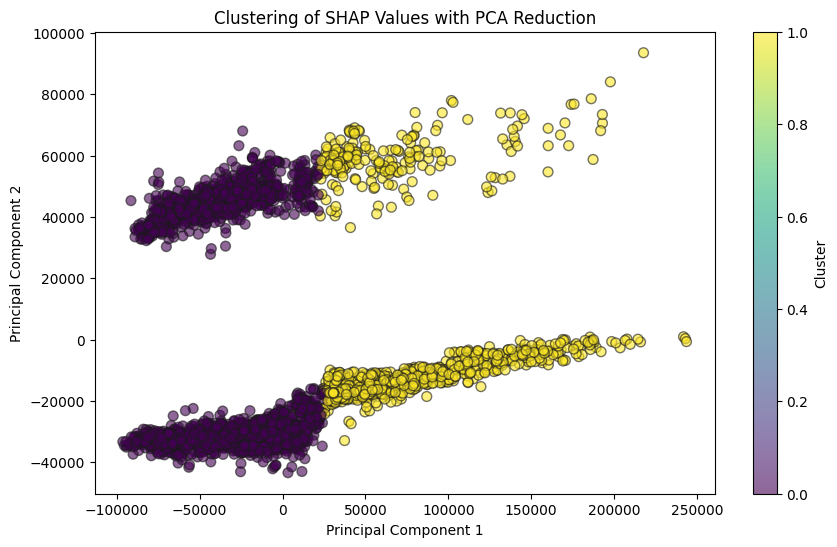

In [1114]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Reduce dimensionality with PCA
pca = PCA(n_components=2)
shap_values_reduced = pca.fit_transform(shap_values)

# Step 2: Choose a clustering algorithm
# We'll start with K-Means for simplicity. Let's assume we want to find 3 clusters.
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(shap_values_reduced)

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(shap_values_reduced[:, 0], shap_values_reduced[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Clustering of SHAP Values with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

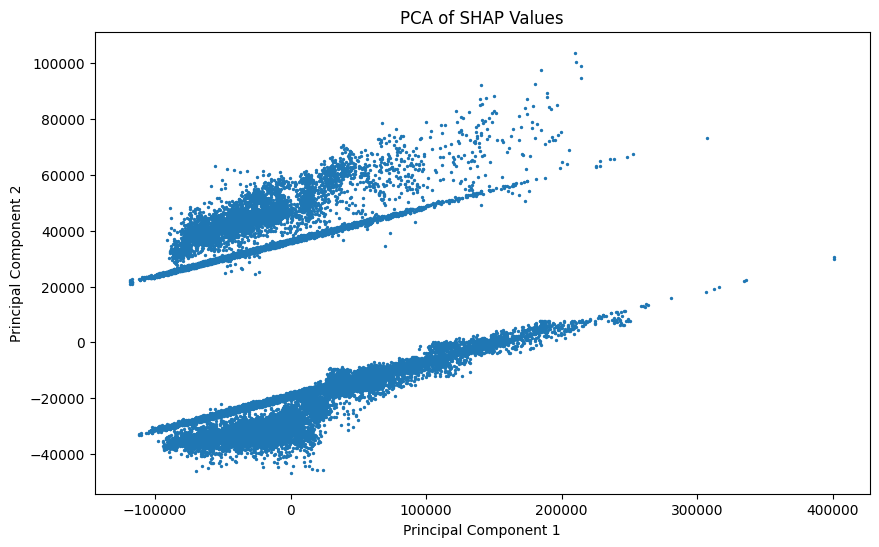

In [1115]:
from sklearn.decomposition import PCA

# Concatenate the SHAP values for both models
all_shap_values = np.concatenate([linear_shap_values, rf_shap_values])

# Compute PCA
pca = PCA(n_components=2)
pca.fit(all_shap_values)

# Transform the SHAP values using PCA
pca_shap_values = pca.transform(all_shap_values)

# Plot the PCA-transformed SHAP values
plt.figure(figsize=(10, 6))
plt.scatter(pca_shap_values[:, 0], pca_shap_values[:, 1],s = 2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SHAP Values')
plt.show()

* Given the visualisation choose a clustering algorithm (K-Means, DBSCAN, gausian mixture...) and
try to cluster the shapley values of the property.


In [1116]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
optimal_n_clusters = 2
gmm = DBSCAN(eps=32000, min_samples=5).fit(all_shap_values)
labels = gmm.labels_
cluster_labels = gmm.fit_predict(all_shap_values)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 12


* Visualise your results


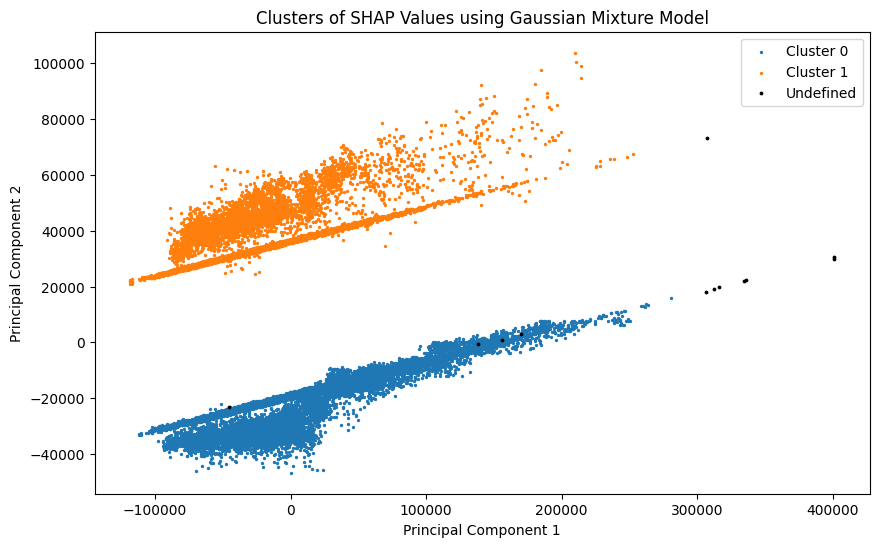

In [1117]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters_):
    plt.scatter(pca_shap_values[cluster_labels == cluster_label, 0],
                pca_shap_values[cluster_labels == cluster_label, 1],
                s = 2,
                label=f'Cluster {cluster_label}')
plt.scatter(pca_shap_values[cluster_labels == -1, 0],
                pca_shap_values[cluster_labels == -1, 1],
                s = 3,
                color="black",
                label=f'Undefined')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of SHAP Values using Gaussian Mixture Model')
plt.legend()
plt.show()

* What characteristics can you give to each cluster?


In [1118]:
# TODO

* What conclusion can you reach?

In [1119]:
# TODO